In [6]:
#import dependencies
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
#helper function that deletes all values from a that are also in b
def deletebfroma(a,b):
    index = np.array([], dtype = np.int16)
    for number in range(len(a)):
        if a[number] in b:
            index = np.append(index, number)

    return np.delete(a, index)
        

# the whole thing is an object
class salesman(object):
    #initialize the object
    def __init__(self, xymax, numberofstops, maxmen, mutationrate, verbose = False, mutatebest = True):
        
        self.numberofstops = numberofstops #number of points to connect
        self.mutatebest = mutatebest #wether the best path at each iteration should be mutated or not
        self.verbose = verbose #wether the best and worst paths for each iteration should be shown
        self.maxmen = maxmen #maximum number of route
        self.xymax = xymax #size of the "map"
        self.mutationrate = mutationrate # rate of mutation 0.1 is plenty
        
        #randomly initialize the targets
        self.targets = np.random.randint(xymax, size=(numberofstops, 2))
        #randomly initialize the route
        self.men = np.empty((maxmen, numberofstops), dtype = np.int32)
        for number in range(maxmen):
            tempman = np.arange(numberofstops, dtype = np.int32)
            np.random.shuffle(tempman)
            self.men[number] = tempman
        
        #find the best route of the first created
        self.best = np.array(self.getbestsalesmen())[...,0][0]
    
    #Method that returns the best route at runtime
    def getbestsalesmen(self):
        #initiate a temporary order
        temporder = np.empty([len(self.men), 2], dtype = np.int32)
        #write the indexes of the route to temporder before ordering changes them
        for number in range(len(self.men)):
            temporder[number] = [number, 0,]
        #get length of path for all route
        for number in range(len(self.men)):
            templength = 0
            #get length of path
            for target in range(len(self.targets) - 1):
                diffx = abs(self.targets[self.men[number][target]][0] - self.targets[self.men[number][target + 1]][0])
                diffy = abs(self.targets[self.men[number][target]][1] - self.targets[self.men[number][target + 1]][1])
                diff = diffy + diffx
                templength = templength + diff
            #add length of way back
            diffx = abs(self.targets[self.men[number][0]][0] - self.targets[self.men[number][-1]][0])
            diffy = abs(self.targets[self.men[number][0]][1] - self.targets[self.men[number][-1]][1])
            diff = diffy + diffx
            templength = templength + diff
            #add length to order
            temporder[number][1] = templength
        #Sort route by length of path
        temporder = sorted(temporder, key=lambda x: -x[1])
        #return the best half of the route rounded up
        return temporder[int(len(temporder)/2):]
    
    #fill the route up with new offspring
    def breednewgeneration(self):
        #get best route indexes
        best = np.array(self.getbestsalesmen())[...,0]
        #replace route by newly bred offspring if they are not among the best
        for i in range(len(self.men)):
            if i not in best:
                self.men[i] = self.men[random.choice(best)].copy() # clone random best
                
    #mutate route
    def mutate(self):
        for i in range(len(self.men)):#for ach route
            if self.mutatebest == True or i != self.best:#mutate best if it is set to true
                for j in range(len(self.men[i]) - 1): # for each piece of dna
                    if random.random() < self.mutationrate:#if random is < mutationrate
                            #switch places with random other gene, might hit itself, but whatever
                            rand = random.randint(0, self.numberofstops - 1)
                            temp = self.men[i][j]
                            self.men[i][j] = self.men[i][rand]
                            self.men[i][rand] = temp
        
    #start calculation
    def calculate(self, iterations):
        #get best and bestlength
        best = np.array(self.getbestsalesmen())[...,0][-1]
        bestlength = np.array(self.getbestsalesmen())[...,1][-1]
        #print best and bestlength at start
        print(self.men[best])
        print('best length: ', bestlength)
        self.draw(best)
        #repeat for number of iterations
        for number in range(iterations):
            #give indication for status
            if number == round(iterations/4):
                print("Status: 1/4")
            if number == round((iterations/4) * 2):
                print("Status: 2/4")
            if number == round((iterations/4) * 3):
                print("Status: 3/4")
            #create new generation
            self.breednewgeneration()
            #set new best as parameter for next iteration
            self.best = np.array(self.getbestsalesmen())[...,0][-1]
            #mutate route
            self.mutate()
            #shout out best and worst length with each iteration if verbose is true
            if self.verbose == 1:
                bestlength = np.array(self.getbestsalesmen())[...,1][-1]
                print('best length: ', bestlength)
                worstlength = np.array(self.getbestsalesmen())[...,1][0]
                print('worst length: ', worstlength)
        #print and draw final best
        best = np.array(self.getbestsalesmen())[...,0][-1]
        bestlength = np.array(self.getbestsalesmen())[...,1][-1]
        print(self.men[best])
        print('best length: ', bestlength)
        self.draw(best)
    
    #draw shiny graphics
    def draw(self, index):
        plt.scatter(self.targets[[...,0]], self.targets[[...,1]], s=20)
        plt.show()
        plt.scatter(self.targets[[...,0]], self.targets[[...,1]], s=20)
        linearray = self.targets[self.men[index]]
        linearray = np.append(linearray, [linearray[0]], axis = 0)
        plt.plot(linearray[[...,0]], linearray[[...,1]])
        plt.show()
            

[ 7  2 24  3 21 15 13 12  6 22 10  5 18 23 11  9 20  8 17  4 16 14  0 19
  1]
best length:  1412


C:\Users\seidenmi\AppData\Local\Continuum\anaconda3\envs\tensor1\lib\site-packages\ipykernel_launcher.py:123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


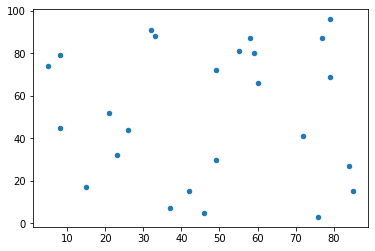

C:\Users\seidenmi\AppData\Local\Continuum\anaconda3\envs\tensor1\lib\site-packages\ipykernel_launcher.py:125: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\seidenmi\AppData\Local\Continuum\anaconda3\envs\tensor1\lib\site-packages\ipykernel_launcher.py:128: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


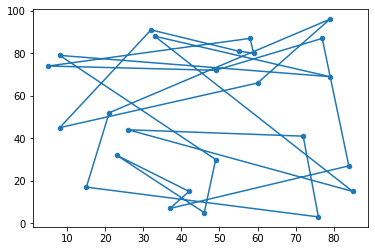

Status: 1/4
Status: 2/4


In [ ]:
#initialize object
man = salesman(100, 25, 25, 0.1, verbose = False, mutatebest = False)

#start calculation
man.calculate(10000)